In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [2]:
from skimage import data
from skimage import io
from skimage.color import rgb2hed
from matplotlib.colors import LinearSegmentedColormap


In [3]:
from skimage import data, feature, exposure

In [4]:
import os 

In [5]:
cwd = os.getcwd()

In [6]:
os = os.chdir('/Users/brittany/Desktop/')

In [7]:
image1 = io.imread('0_ugperml.png')

/Users/brittany/anaconda2/lib/python2.7/site-packages/PIL/TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 4718592 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))


In [8]:
image1

array([[[173, 156, 210],
        [175, 159, 208],
        [175, 160, 203],
        ...,
        [ 99,  91, 140],
        [112, 104, 145],
        [116, 108, 149]],

       [[169, 152, 206],
        [170, 154, 203],
        [172, 156, 201],
        ...,
        [ 98,  88, 140],
        [109, 100, 143],
        [113, 105, 146]],

       [[174, 155, 210],
        [173, 155, 207],
        [172, 155, 200],
        ...,
        [ 98,  85, 139],
        [109,  97, 143],
        [113, 102, 144]],

       ...,

       [[ 18,   0,  58],
        [ 17,   0,  55],
        [ 16,   0,  54],
        ...,
        [ 41,  31,  29],
        [ 38,  28,  27],
        [ 37,  27,  26]],

       [[ 23,   3,  62],
        [ 22,   2,  61],
        [ 21,   2,  58],
        ...,
        [ 42,  32,  30],
        [ 39,  29,  27],
        [ 36,  28,  26]],

       [[ 30,   9,  68],
        [ 29,   8,  67],
        [ 29,   8,  67],
        ...,
        [ 41,  33,  30],
        [ 38,  28,  26],
        [ 35,  27,  25]]

In [9]:
from math import sqrt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

In [10]:
import matplotlib.pyplot as plt

In [11]:
#import original image 
image = image1

In [12]:
#convert the image to gray scale 
image_gray = rgb2gray(image)

In [13]:
#find blogs in the image 
blobs_log = blob_log(image_gray,max_sigma = 30,num_sigma = 10, threshold = .1)

In [14]:
blobs_log

array([[3095.        , 2113.        ,    7.44444444],
       [3095.        , 1680.        ,   10.66666667],
       [3095.        , 1632.        ,    7.44444444],
       ...,
       [   0.        ,  692.        ,   26.77777778],
       [   0.        ,  105.        ,    7.44444444],
       [   0.        ,   37.        ,   17.11111111]])

In [15]:
bw = image.mean(axis = 2)

In [16]:
fig = plt.figure(figsize = (15,15))


In [17]:
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r+1, color='red', linewidth=2)
    #ax.add_patch(c)

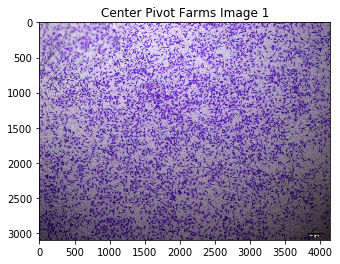

Number of center pivot farms detected: 5827


In [18]:
plt.imshow(image)
plt.title('Center Pivot Farms Image 1')

plt.show()
print('Number of center pivot farms detected: ' + str(len(blobs_log)))

In [19]:
image

array([[[173, 156, 210],
        [175, 159, 208],
        [175, 160, 203],
        ...,
        [ 99,  91, 140],
        [112, 104, 145],
        [116, 108, 149]],

       [[169, 152, 206],
        [170, 154, 203],
        [172, 156, 201],
        ...,
        [ 98,  88, 140],
        [109, 100, 143],
        [113, 105, 146]],

       [[174, 155, 210],
        [173, 155, 207],
        [172, 155, 200],
        ...,
        [ 98,  85, 139],
        [109,  97, 143],
        [113, 102, 144]],

       ...,

       [[ 18,   0,  58],
        [ 17,   0,  55],
        [ 16,   0,  54],
        ...,
        [ 41,  31,  29],
        [ 38,  28,  27],
        [ 37,  27,  26]],

       [[ 23,   3,  62],
        [ 22,   2,  61],
        [ 21,   2,  58],
        ...,
        [ 42,  32,  30],
        [ 39,  29,  27],
        [ 36,  28,  26]],

       [[ 30,   9,  68],
        [ 29,   8,  67],
        [ 29,   8,  67],
        ...,
        [ 41,  33,  30],
        [ 38,  28,  26],
        [ 35,  27,  25]]

In [20]:
#compute the pixels in the 2-98th percentile
p2, p98 = np.percentile(image, (2,98))

In [21]:
#rescale the exposure of the image to be within the defined percentile 
img_rescale = exposure.rescale_intensity(image, in_range = (p2,p98))

In [22]:
#create an equalized histogram 
img_eq = exposure.equalize_hist(image)

/Users/brittany/anaconda2/lib/python2.7/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


In [23]:
import skimage

In [24]:
#change the numpy array to be an object 
image = skimage.img_as_float(image)
image

array([[[0.67843137, 0.61176471, 0.82352941],
        [0.68627451, 0.62352941, 0.81568627],
        [0.68627451, 0.62745098, 0.79607843],
        ...,
        [0.38823529, 0.35686275, 0.54901961],
        [0.43921569, 0.40784314, 0.56862745],
        [0.45490196, 0.42352941, 0.58431373]],

       [[0.6627451 , 0.59607843, 0.80784314],
        [0.66666667, 0.60392157, 0.79607843],
        [0.6745098 , 0.61176471, 0.78823529],
        ...,
        [0.38431373, 0.34509804, 0.54901961],
        [0.42745098, 0.39215686, 0.56078431],
        [0.44313725, 0.41176471, 0.57254902]],

       [[0.68235294, 0.60784314, 0.82352941],
        [0.67843137, 0.60784314, 0.81176471],
        [0.6745098 , 0.60784314, 0.78431373],
        ...,
        [0.38431373, 0.33333333, 0.54509804],
        [0.42745098, 0.38039216, 0.56078431],
        [0.44313725, 0.4       , 0.56470588]],

       ...,

       [[0.07058824, 0.        , 0.22745098],
        [0.06666667, 0.        , 0.21568627],
        [0.0627451 , 0

In [25]:
#create a function to define the histogram 
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = skimage.img_as_float(image_gray)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image_gray, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    ax_img.set_adjustable('box-forced')

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image_gray, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

In [ ]:

img_adapteq = exposure.equalize_adapthist(image, clip_limit=0.03)

/Users/brittany/anaconda2/lib/python2.7/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


In [ ]:
#plot the graph of the pixels and where they fall across the image 
fig = plt.figure(figsize=(8,5))

axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 2, 1)
for i in range(1, 1):
    axes[0, i] = fig.add_subplot(2, 2, 2+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 1):
   axes[1, i] = fig.add_subplot(1,1, 1+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(image_gray, axes[:, 0])
ax_img.set_title('Low contrast image')
